In [278]:
import pandas as pd
import numpy as np
print(np. __version__)

1.26.4


In [279]:
electricity_prices = pd.read_csv("./electricity_prices.csv")
stock_prices = pd.read_csv("./stock_prices.csv")
weather_data = pd.read_csv("./weather_data.csv")

In [280]:
electricity_prices = electricity_prices[electricity_prices.columns[1:]]
electricity_prices['Time'] = pd.to_datetime(electricity_prices['Time'])
electricity_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34247 entries, 0 to 34246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    34247 non-null  datetime64[ns]
 1   Price   34247 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 535.2 KB


In [281]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14986 non-null  int64  
 1   Time        14986 non-null  object 
 2   ^GSPC       14986 non-null  float64
 3   CL=F        14986 non-null  float64
 4   BZ=F        14986 non-null  float64
 5   UNG         14986 non-null  float64
 6   GC=F        14986 non-null  float64
 7   URA         14986 non-null  float64
 8   XLE         14986 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.0+ MB


In [282]:
stock_prices = stock_prices[stock_prices.columns[1:]]
stock_prices['Time'] = pd.to_datetime(stock_prices['Time'])
stock_prices.head()


,Time,^GSPC,CL=F,BZ=F,UNG,GC=F,URA,XLE
0,2022-11-29 05:00:00,3974.030029,78.510002,84.879997,89.559998,1753.000000,20.455,90.964996
1,2022-11-29 06:00:00,3974.030029,78.349998,84.580002,89.559998,1751.099976,20.455,90.964996
2,2022-11-29 07:00:00,3974.030029,78.629997,85.050003,89.559998,1752.400024,20.455,90.964996
3,2022-11-29 08:00:00,3974.030029,78.970001,85.279999,89.559998,1756.400024,20.455,90.964996
4,2022-11-29 09:00:00,3974.030029,78.839996,84.989998,89.559998,1752.699951,20.455,90.964996


In [283]:
weather_data = weather_data[weather_data.columns[1:]]
weather_data['Time'] = pd.to_datetime(weather_data['Time'])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33501 entries, 0 to 33500
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      33501 non-null  datetime64[ns]
 1   Pressure (hPa)            33501 non-null  float64       
 2   Temperature (°C)          33501 non-null  float64       
 3   Avg Wind Speed (m/s)      33501 non-null  float64       
 4   Max Avg Wind Speed (m/s)  33501 non-null  float64       
 5   Avg Wind Direction (°)    33501 non-null  float64       
 6   Max Gust (m/s)            33501 non-null  float64       
 7   Humidity (%)              33501 non-null  int64         
 8   Min Temperature (°C)      33501 non-null  float64       
 9   Max Temperature (°C)      33501 non-null  float64       
 10  Hour of Day               33501 non-null  int64         
 11  Day of Week               33501 non-null  int64         
 12  Month             

In [284]:
weather_data.head()

,Time,Pressure (hPa),Temperature (°C),Avg Wind Speed (m/s),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Min Temperature (°C),Max Temperature (°C),Hour of Day,Day of Week,Month
0,2021-01-01 02:00:00,1010.1,-0.3,1.0,1.9,266.0,2.3,99,-0.3,-0.2,2,4,1
1,2021-01-01 03:00:00,1010.5,-0.1,0.5,1.0,0.0,1.8,99,-0.2,0.0,3,4,1
2,2021-01-01 04:00:00,1010.8,0.0,0.6,0.9,0.0,1.1,99,0.0,0.1,4,4,1
3,2021-01-01 05:00:00,1011.0,0.0,0.8,1.1,81.0,1.9,99,0.0,0.1,5,4,1
4,2021-01-01 06:00:00,1011.1,0.2,1.0,1.4,103.0,1.6,99,0.1,0.6,6,4,1


In [285]:
duplicates = stock_prices['Time'].duplicated()
print(duplicates.sum())

3498


In [286]:
duplicates = weather_data['Time'].duplicated()
print(duplicates.sum())

4


In [287]:
duplicates = electricity_prices['Time'].duplicated()
print(duplicates.sum())

4


In [288]:
def nuke_dupes(df):
    return df.loc[~df['Time'].duplicated(keep='last')]


electricity_prices = nuke_dupes(electricity_prices)
weather_data = nuke_dupes(weather_data)
stock_prices = nuke_dupes(stock_prices)

In [289]:
spot_pricing_dataset = pd.merge(electricity_prices, weather_data, on='Time', how='inner')
spot_pricing_dataset = pd.merge(spot_pricing_dataset, stock_prices, on='Time', how='inner')

In [290]:
correlation_matrix = spot_pricing_dataset.corr()

In [291]:
spot_pricing_dataset.head()


,Time,Price,Pressure (hPa),Temperature (°C),Avg Wind Speed (m/s),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Min Temperature (°C),...,Hour of Day,Day of Week,Month,^GSPC,CL=F,BZ=F,UNG,GC=F,URA,XLE
0,2022-11-29 05:00:00,29.916,1034.1,-0.2,2.1,3.0,91.0,4.5,94,-0.8,...,5,1,11,3974.030029,78.510002,84.879997,89.559998,1753.000000,20.455,90.964996
1,2022-11-29 06:00:00,34.766,1034.3,0.6,2.6,3.1,113.0,4.5,91,0.5,...,6,1,11,3974.030029,78.349998,84.580002,89.559998,1751.099976,20.455,90.964996
2,2022-11-29 07:00:00,43.176,1034.4,0.6,2.5,2.7,104.0,4.1,92,0.6,...,7,1,11,3974.030029,78.629997,85.050003,89.559998,1752.400024,20.455,90.964996
3,2022-11-29 08:00:00,49.131,1034.6,0.8,2.6,2.8,108.0,3.9,92,0.7,...,8,1,11,3974.030029,78.970001,85.279999,89.559998,1756.400024,20.455,90.964996
4,2022-11-29 09:00:00,55.000,1035.1,1.1,2.9,3.3,118.0,4.9,89,1.0,...,9,1,11,3974.030029,78.839996,84.989998,89.559998,1752.699951,20.455,90.964996


In [292]:
from sklearn.preprocessing import StandardScaler

df = spot_pricing_dataset
scaler = StandardScaler()
cols = df.columns[df.columns != 'Time']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Time,Price,Pressure (hPa),Temperature (°C),Avg Wind Speed (m/s),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Min Temperature (°C),...,Hour of Day,Day of Week,Month,^GSPC,CL=F,BZ=F,UNG,GC=F,URA,XLE
0,2022-11-29 05:00:00,1.976415,1.889392,-0.736395,-0.545451,-0.383938,-0.941638,-0.447154,0.845010,-0.757307,...,-0.900765,-0.740531,1.317538,-1.254764,0.250866,0.633851,4.884124,-1.442782,-1.261276,0.79333
1,2022-11-29 06:00:00,2.418566,1.906594,-0.653210,-0.285002,-0.336521,-0.721756,-0.447154,0.677930,-0.621094,...,-0.752547,-0.740531,1.317538,-1.254764,0.221590,0.577630,4.884124,-1.449901,-1.261276,0.79333
2,2022-11-29 07:00:00,3.185265,1.915195,-0.653210,-0.337092,-0.526186,-0.811708,-0.567667,0.733623,-0.610616,...,-0.604329,-0.740531,1.317538,-1.254764,0.272822,0.665711,4.884124,-1.445030,-1.261276,0.79333
3,2022-11-29 08:00:00,3.728154,1.932398,-0.632414,-0.285002,-0.478770,-0.771729,-0.627924,0.733623,-0.600138,...,-0.456111,-0.740531,1.317538,-1.254764,0.335032,0.708814,4.884124,-1.430043,-1.261276,0.79333
4,2022-11-29 09:00:00,4.263202,1.975403,-0.601220,-0.128734,-0.241689,-0.671783,-0.326641,0.566543,-0.568704,...,-0.307893,-0.740531,1.317538,-1.254764,0.311245,0.654466,4.884124,-1.443906,-1.261276,0.79333


<Axes: >

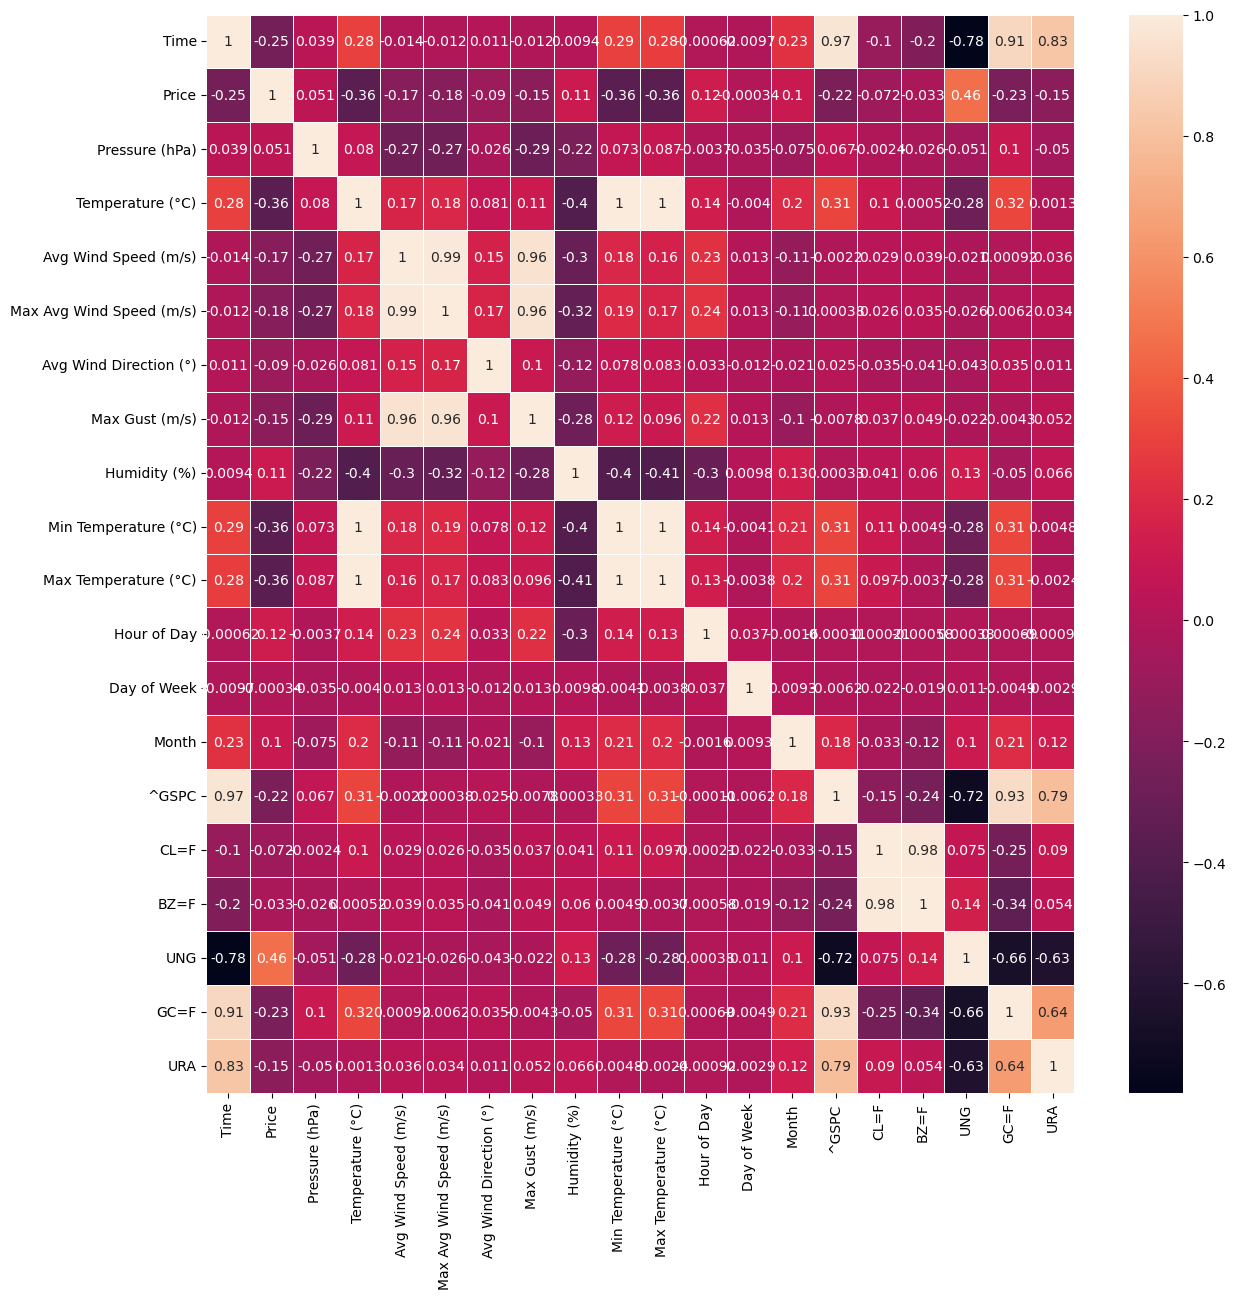

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = df.columns[:-1]
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df[cols].corr(), annot=True, linewidths=.5, ax=ax)

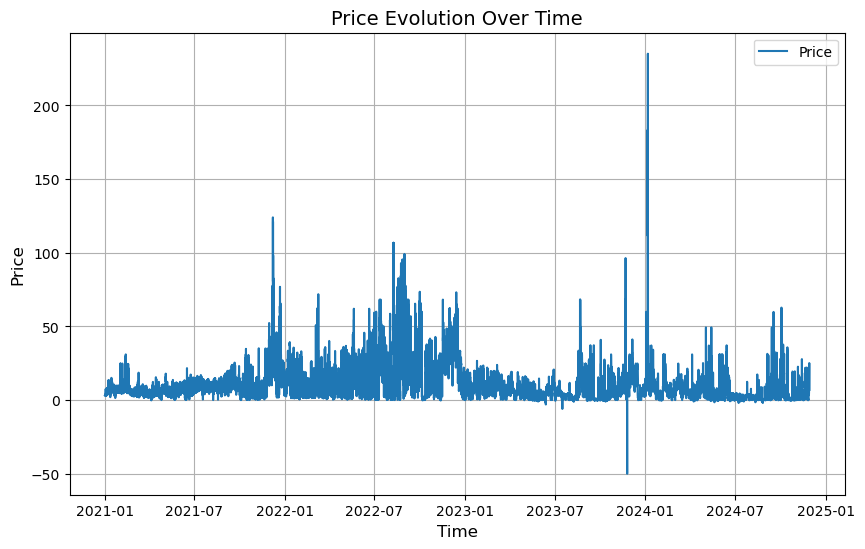

In [294]:
plt.figure(figsize=(10, 6))
plt.plot(electricity_prices['Time'], electricity_prices['Price'], label='Price')
plt.title('Price Evolution Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

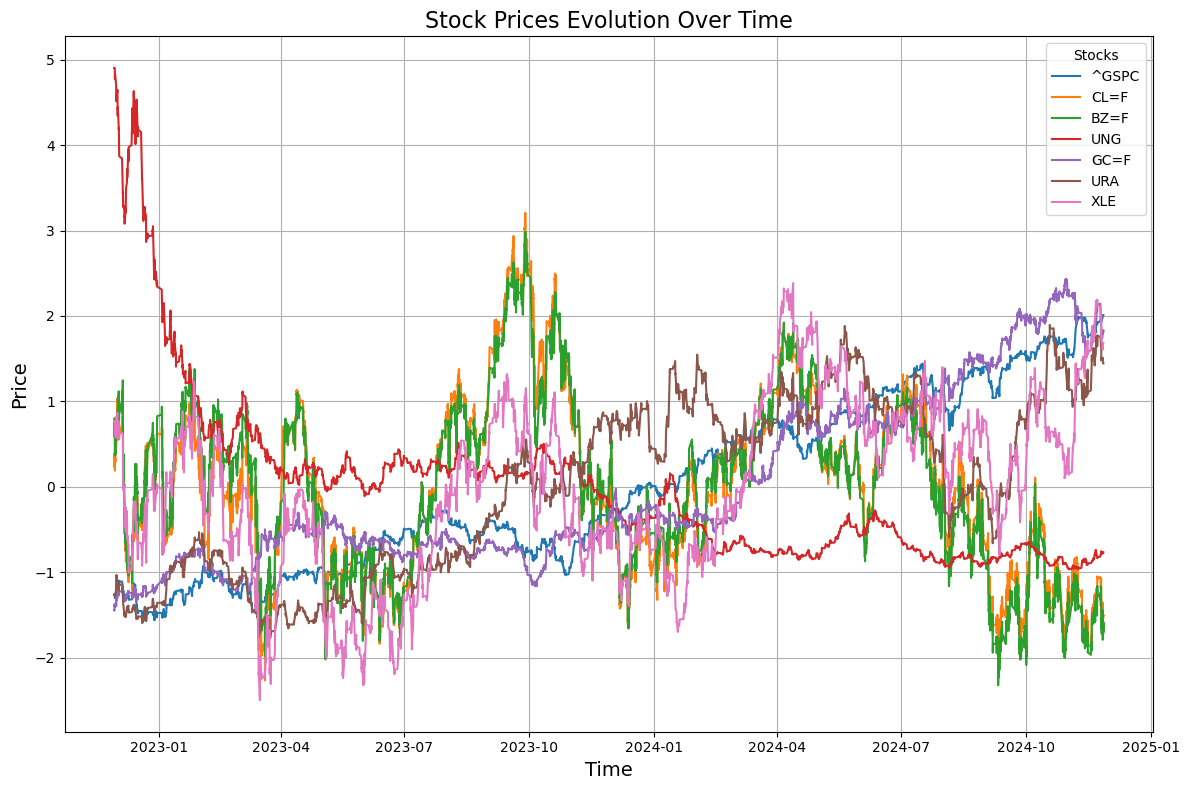

In [295]:
scaled_stocks = stock_prices
scaler = StandardScaler()
cols = scaled_stocks.columns[scaled_stocks.columns != 'Time']
scaled_stocks[cols] = scaler.fit_transform(scaled_stocks[cols])
scaled_stocks.head()

plt.figure(figsize=(12, 8))

for column in scaled_stocks.columns[1:]:
    plt.plot(scaled_stocks['Time'], scaled_stocks[column], label=column)

plt.title('Stock Prices Evolution Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend(title="Stocks", fontsize=10)
plt.tight_layout()
plt.show()

In [296]:
#possible transformations:
#cap price to avoid the big outliers
#min-max temperature seem kinda useless - temp variation?


In [297]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 10 * IQR
    upper_bound = Q3 + 10 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(electricity_prices['Price'])

print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 15


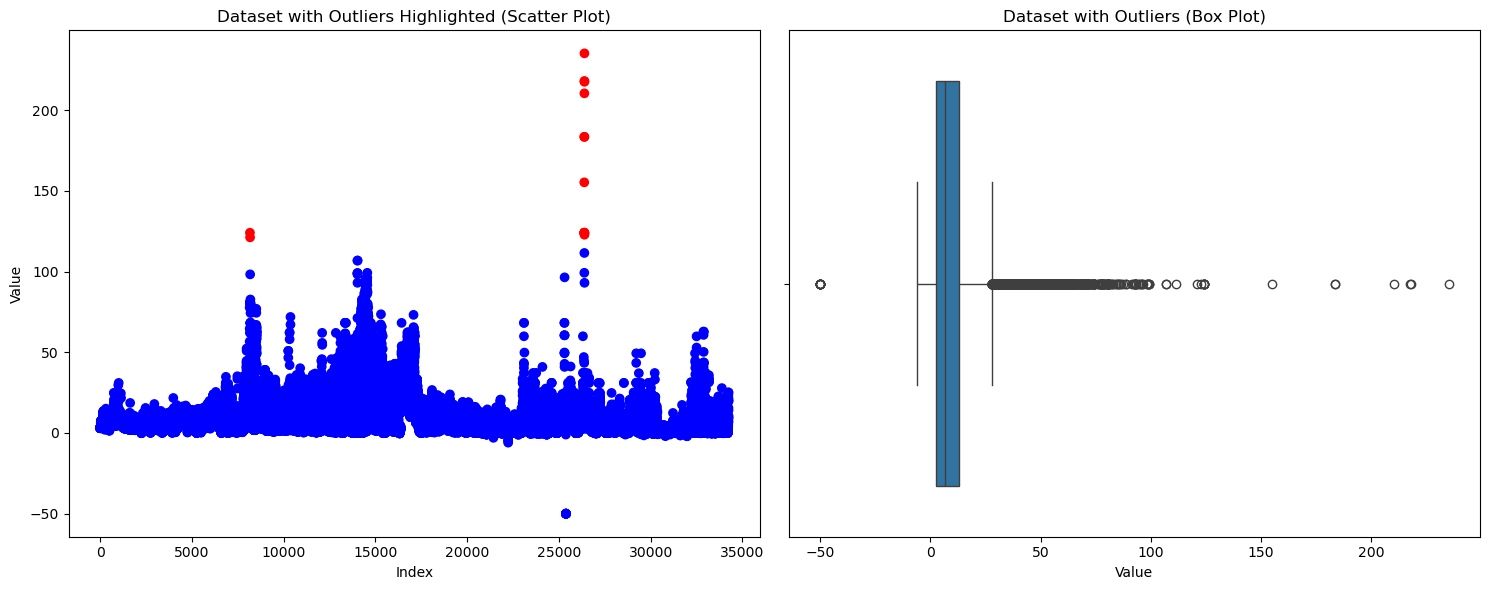

In [298]:
# Visualize the data with outliers using scatter plot and box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
ax1.scatter(range(len(electricity_prices)), electricity_prices['Price'], c=['blue' if not x else 'red' for x in outliers])
ax1.set_title('Dataset with Outliers Highlighted (Scatter Plot)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

# Box plot
sns.boxplot(x=electricity_prices['Price'], ax=ax2)
ax2.set_title('Dataset with Outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()

In [299]:
#Let's drop the stocks, less intuituive, figure how to integrate them later
spd = pd.merge(electricity_prices, weather_data, on='Time', how='inner')

In [300]:
spd['Temperature Variation'] = spd['Max Temperature (°C)'] - spd['Min Temperature (°C)']
spd = spd.drop(['Max Temperature (°C)', 'Min Temperature (°C)'], axis=1)
spd.head()

,Time,Price,Pressure (hPa),Temperature (°C),Avg Wind Speed (m/s),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Hour of Day,Day of Week,Month,Temperature Variation
0,2021-01-01 02:00:00,3.019,1010.1,-0.3,1.0,1.9,266.0,2.3,99,2,4,1,0.1
1,2021-01-01 03:00:00,2.974,1010.5,-0.1,0.5,1.0,0.0,1.8,99,3,4,1,0.2
2,2021-01-01 04:00:00,2.941,1010.8,0.0,0.6,0.9,0.0,1.1,99,4,4,1,0.1
3,2021-01-01 05:00:00,2.943,1011.0,0.0,0.8,1.1,81.0,1.9,99,5,4,1,0.1
4,2021-01-01 06:00:00,2.983,1011.1,0.2,1.0,1.4,103.0,1.6,99,6,4,1,0.5


In [301]:
#Day of week sucks with everything: dump it
#Max Avg Wind speed is near same as wind speed, but very insignificantly better, lets go with it
spd = spd.drop(['Day of Week'], axis = 1)
spd  = spd.drop(['Avg Wind Speed (m/s)'], axis = 1)
spd.head()

,Time,Price,Pressure (hPa),Temperature (°C),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Hour of Day,Month,Temperature Variation
0,2021-01-01 02:00:00,3.019,1010.1,-0.3,1.9,266.0,2.3,99,2,1,0.1
1,2021-01-01 03:00:00,2.974,1010.5,-0.1,1.0,0.0,1.8,99,3,1,0.2
2,2021-01-01 04:00:00,2.941,1010.8,0.0,0.9,0.0,1.1,99,4,1,0.1
3,2021-01-01 05:00:00,2.943,1011.0,0.0,1.1,81.0,1.9,99,5,1,0.1
4,2021-01-01 06:00:00,2.983,1011.1,0.2,1.4,103.0,1.6,99,6,1,0.5


<Axes: >

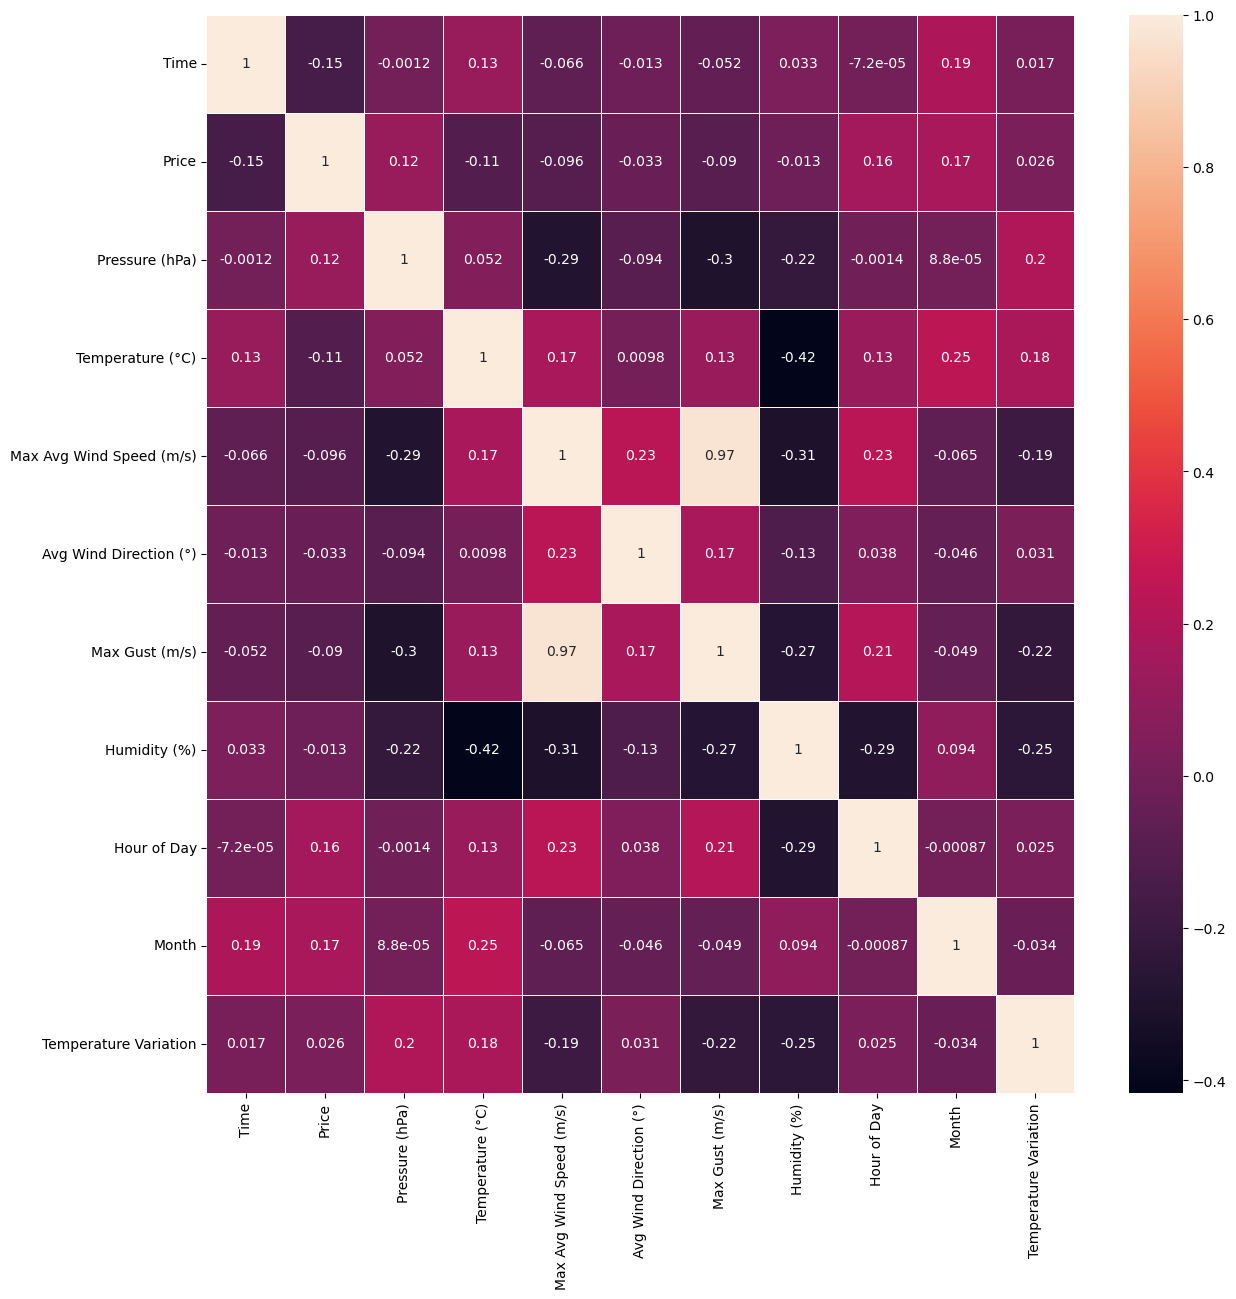

In [302]:
cols = spd.columns
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(spd[cols].corr(), annot=True, linewidths=.5, ax=ax)

<Axes: >

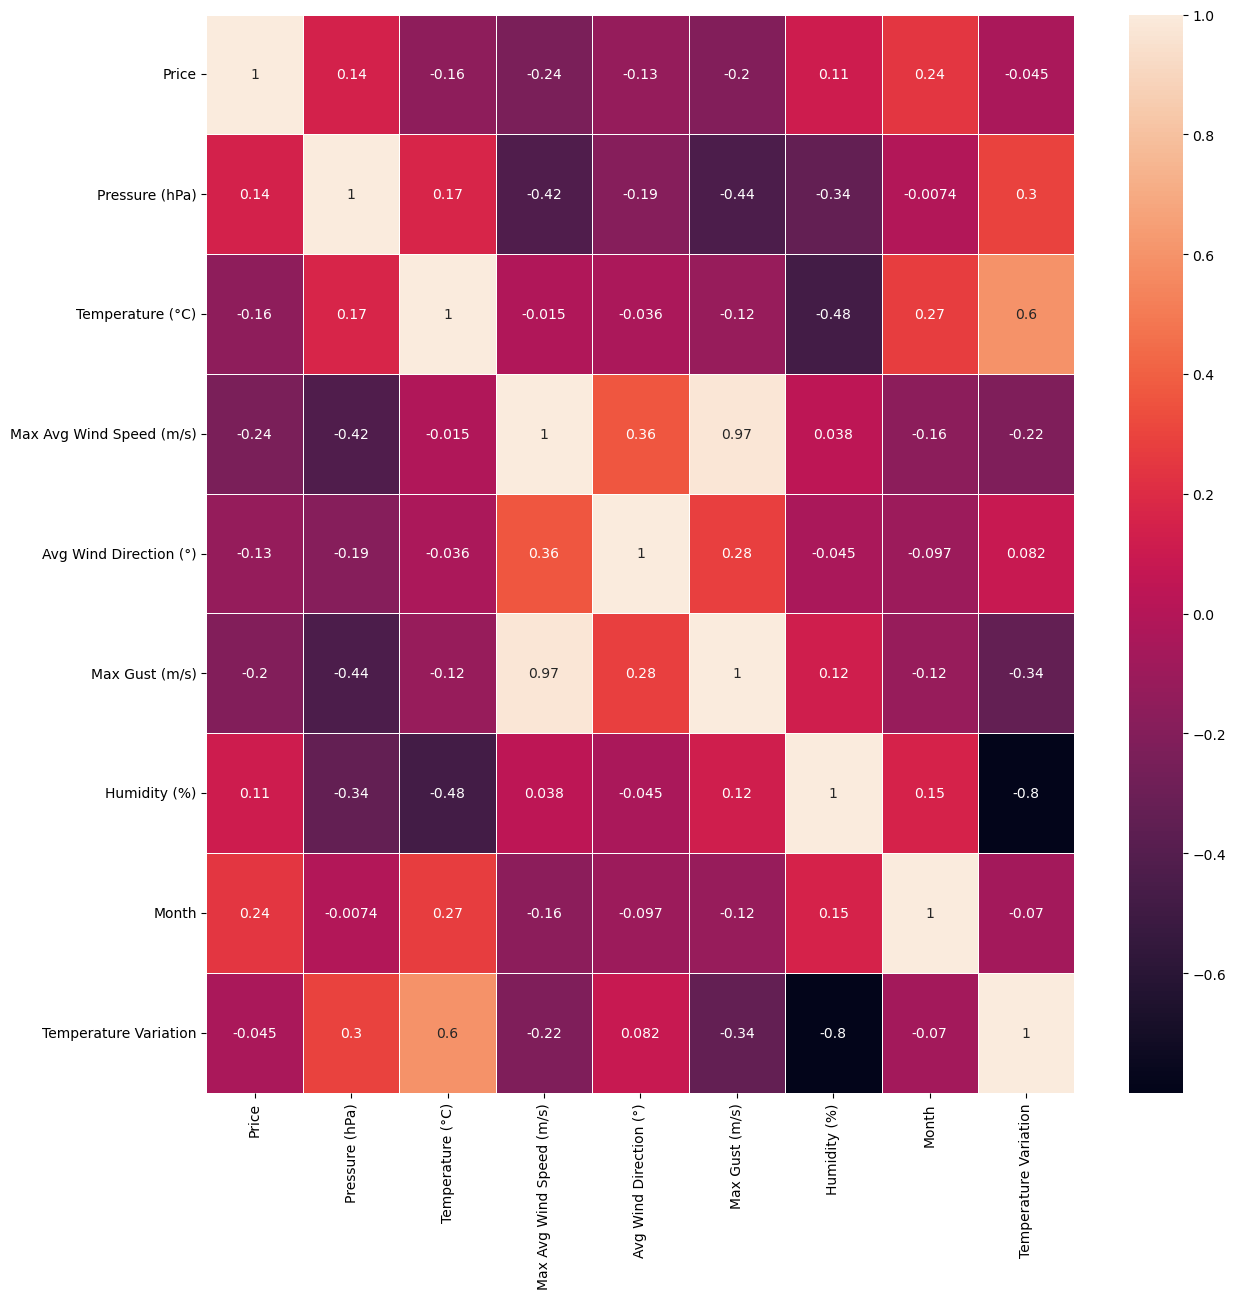

In [303]:
weekavgspd = spd.copy()
weekavgspd = weekavgspd.drop("Hour of Day", axis = 1)
weekavgspd = weekavgspd.set_index('Time').resample('W').mean()


weekavgspd.head()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(weekavgspd.corr(), annot=True, linewidths=.5, ax=ax)

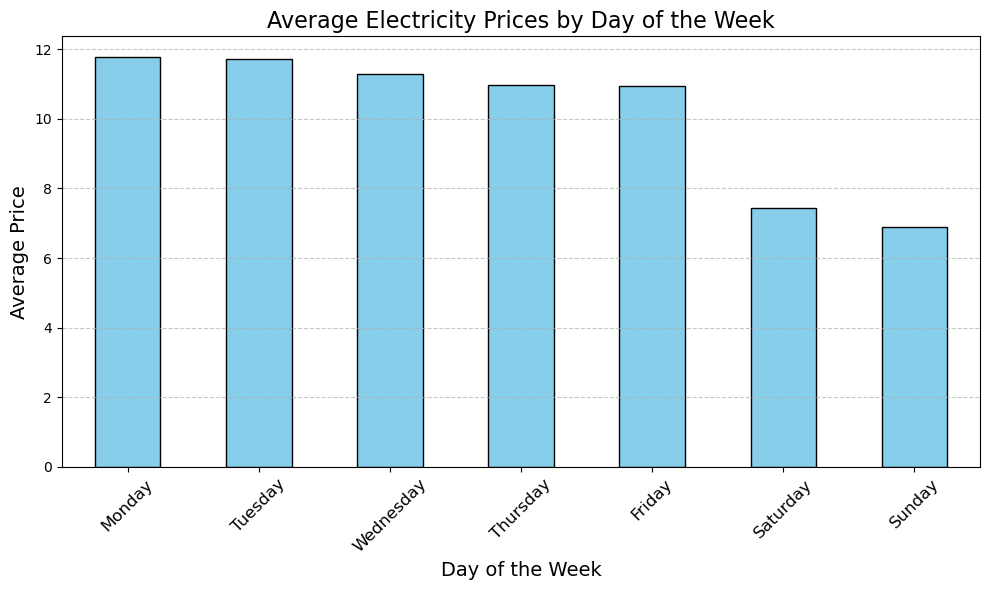

In [304]:
#Checking weekly seems to yield strong corrs
#Check = how avg price evolves per weekday
#Check = how avg price evolves per hour
ep = electricity_prices.copy()
ep['day_of_week'] = ep['Time'].dt.day_name()

# Group by day of the week and calculate the average price
weekly_avg_prices = ep.groupby('day_of_week')['Price'].mean()

# Ensure the days are in the correct order
weekly_avg_prices = weekly_avg_prices.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the bar graph
plt.figure(figsize=(10, 6))
weekly_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Electricity Prices by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

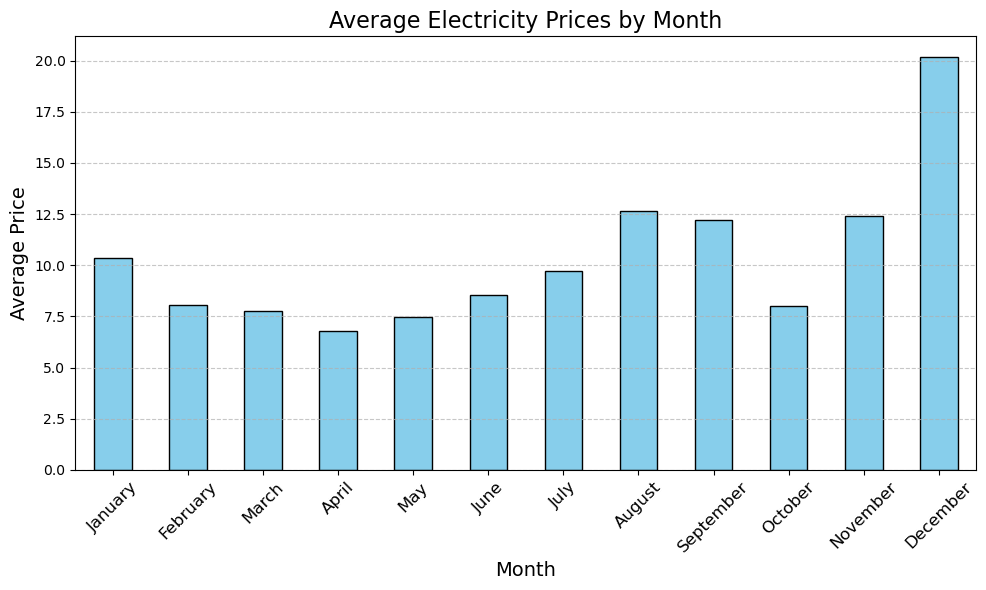

In [305]:
ep = electricity_prices.copy()
ep['month'] = ep['Time'].dt.month_name()

# Group by day of the week and calculate the average price
monthly_avg_prices = ep.groupby('month')['Price'].mean()

# Ensure the days are in the correct order
monthly_avg_prices = monthly_avg_prices.reindex([
    'January', 'February', 'March', 'April', 
    'May', 'June', 'July', 'August', 
    'September', 'October', 'November', 'December'
])


# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Electricity Prices by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

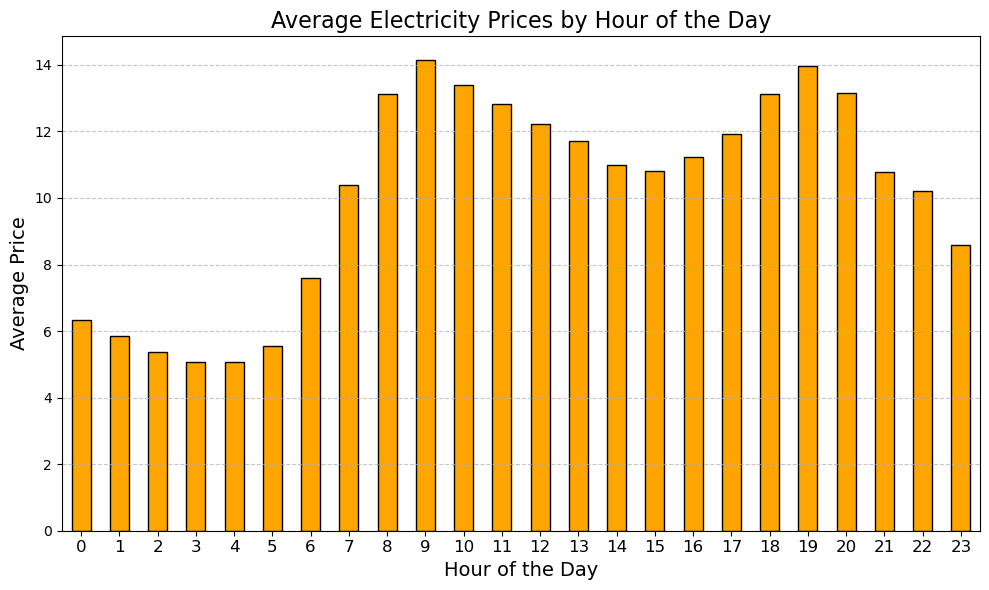

In [306]:
ep = electricity_prices.copy()
ep['hour'] = ep['Time'].dt.hour

# Group by hour and calculate the average price
hourly_avg_prices = ep.groupby('hour')['Price'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
hourly_avg_prices.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Electricity Prices by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [307]:
spd.head()

,Time,Price,Pressure (hPa),Temperature (°C),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Hour of Day,Month,Temperature Variation
0,2021-01-01 02:00:00,3.019,1010.1,-0.3,1.9,266.0,2.3,99,2,1,0.1
1,2021-01-01 03:00:00,2.974,1010.5,-0.1,1.0,0.0,1.8,99,3,1,0.2
2,2021-01-01 04:00:00,2.941,1010.8,0.0,0.9,0.0,1.1,99,4,1,0.1
3,2021-01-01 05:00:00,2.943,1011.0,0.0,1.1,81.0,1.9,99,5,1,0.1
4,2021-01-01 06:00:00,2.983,1011.1,0.2,1.4,103.0,1.6,99,6,1,0.5


In [308]:
import pandas as pd

def times_extractor(df):
    """
    Adds three new columns to the given DataFrame based on the 'Time' column:
        - timeofyear: 0 for Jan-Jul, 1 for Aug-Nov, 2 for Dec
        - weekend: 0 for Mon-Fri, 1 for Sat-Sun
        - night: 1 for 00-06, 0 for other times
    Args:
        df (pd.DataFrame): DataFrame with a 'Time' column in datetime format.
    Returns:
        pd.DataFrame: Updated DataFrame with the new columns added.
    """
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Add the 'timeofyear' column
    df['timeofyear'] = df['Time'].dt.month.map(lambda x: 0 if x <= 7 else (1 if x <= 11 else 2))

    # Add the 'weekend' column
    df['weekend'] = df['Time'].dt.weekday.map(lambda x: 1 if x >= 5 else 0)

    # Add the 'night' column
    df['night'] = df['Time'].dt.hour.map(lambda x: 1 if 0 <= x <= 6 else 0)

    return df

<Axes: >

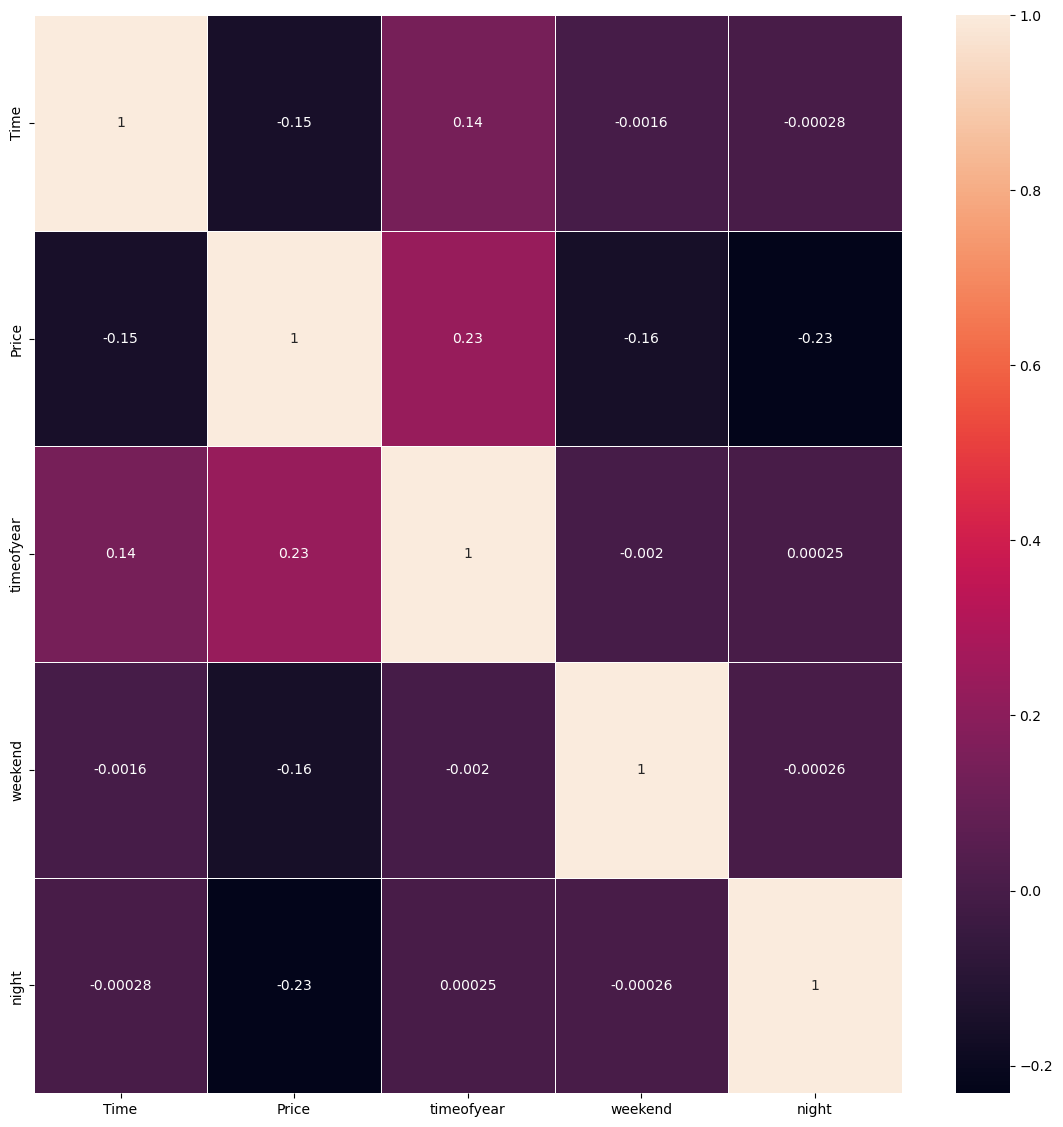

In [309]:
ep = electricity_prices.copy()
ep = times_extractor(ep)
ep.head()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(ep.corr(), annot=True, linewidths=.5, ax=ax)

In [310]:
#Good enough, let's shove them into spd
spd = times_extractor(spd)
spd.head()

,Time,Price,Pressure (hPa),Temperature (°C),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Hour of Day,Month,Temperature Variation,timeofyear,weekend,night
0,2021-01-01 02:00:00,3.019,1010.1,-0.3,1.9,266.0,2.3,99,2,1,0.1,0,0,1
1,2021-01-01 03:00:00,2.974,1010.5,-0.1,1.0,0.0,1.8,99,3,1,0.2,0,0,1
2,2021-01-01 04:00:00,2.941,1010.8,0.0,0.9,0.0,1.1,99,4,1,0.1,0,0,1
3,2021-01-01 05:00:00,2.943,1011.0,0.0,1.1,81.0,1.9,99,5,1,0.1,0,0,1
4,2021-01-01 06:00:00,2.983,1011.1,0.2,1.4,103.0,1.6,99,6,1,0.5,0,0,1


In [311]:
#Let's try some prediction and go from here
#trying arimax, new to me!
spd = spd.set_index('Time')
spd.columns

Index(['Price', 'Pressure (hPa)', 'Temperature (°C)',
       'Max Avg Wind Speed (m/s)', 'Avg Wind Direction (°)', 'Max Gust (m/s)',
       'Humidity (%)', 'Hour of Day', 'Month', 'Temperature Variation',
       'timeofyear', 'weekend', 'night'],
      dtype='object')

In [312]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

spd.index = pd.to_datetime(spd.index)
spd.index = spd.index.to_period('h')


In [313]:
spd.isnull().values.any()

False

In [314]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cond = scaler.fit_transform(spd)
scaled_df = pd.DataFrame(scaled_cond, columns=spd.columns)
scaled_df.head()

,Price,Pressure (hPa),Temperature (°C),Max Avg Wind Speed (m/s),Avg Wind Direction (°),Max Gust (m/s),Humidity (%),Hour of Day,Month,Temperature Variation,timeofyear,weekend,night
0,-0.594577,-0.181098,-0.715085,-0.954839,0.752069,-1.144791,1.177234,-1.371951,-1.575079,-1.014129,-0.744582,-0.632436,1.557689
1,-0.598400,-0.147088,-0.694724,-1.378801,-1.845247,-1.294664,1.177234,-1.227546,-1.575079,-0.891867,-0.744582,-0.632436,1.557689
2,-0.601203,-0.121580,-0.684543,-1.425908,-1.845247,-1.504486,1.177234,-1.083142,-1.575079,-1.014129,-0.744582,-0.632436,1.557689
3,-0.601033,-0.104574,-0.684543,-1.331694,-1.054335,-1.264689,1.177234,-0.938737,-1.575079,-1.014129,-0.744582,-0.632436,1.557689
4,-0.597635,-0.096072,-0.664182,-1.190374,-0.839519,-1.354613,1.177234,-0.794332,-1.575079,-0.525081,-0.744582,-0.632436,1.557689


In [315]:
forecast_steps = 240

cropped_df = spd[:-forecast_steps]

In [316]:

model = pm.auto_arima(cropped_df['Price'], 
                      exogenous=sm.add_constant(scaled_df[scaled_df.columns[1:]]),  # Include exogenous variables
                      seasonal=True,   # Set to True if your data has seasonality
                      stepwise=True,    # Stepwise search for parameters
                      trace=True)       # Display progress


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=174992.289, Time=22.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=176733.422, Time=0.82 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=175078.582, Time=0.95 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=175048.988, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=176731.422, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=175046.044, Time=6.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173132.093, Time=27.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=175044.433, Time=5.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=175045.152, Time=2.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=174992.080, Time=21.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=175044.421, Time=2.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=173097.887, Time=48.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=172872.866, Time=60.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=172873.180, Time=29.01 sec

In [317]:
spd.index = spd.index.to_timestamp()

In [318]:
forecast = model.predict(n_periods=forecast_steps, exogenous=scaled_df[scaled_df.columns[1:]].iloc[-forecast_steps:])
print(forecast)

2024-10-17 15:00     9.744045
2024-10-17 16:00     9.060437
2024-10-17 17:00     9.095705
2024-10-17 18:00     9.078289
2024-10-17 19:00     9.450842
                      ...    
2024-10-27 10:00    10.795633
2024-10-27 11:00    10.795633
2024-10-27 12:00    10.795633
2024-10-27 13:00    10.795633
2024-10-27 14:00    10.795633
Freq: h, Length: 240, dtype: float64


In [ ]:
def plot_results(data, forecast_df, days):
    """
    Plot the observed data and forecasted values for a specified period.

    Parameters:
    data (pd.DataFrame): DataFrame containing the observed time series.
    forecast_df (pd.DataFrame): DataFrame containing the forecasted values and confidence intervals.
    days (int): Number of days of observed data to display before the forecast.
    """
    # Calculate the starting index for the observed data
    end_date = forecast_df.index[0]  # Convert Period to Timestamp if necessary
    start_date = end_date - pd.Timedelta(days=days)
    
    # Filter the observed data for the desired range
    filtered_data = data[start_date:]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data.index, filtered_data['Price'], label='Observed')  # Ensure timestamps match
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
    
    # If confidence intervals are needed, uncomment and adjust as necessary
    # plt.fill_between(forecast_df.index.to_timestamp(), forecast_df['Lower CI'], forecast_df['Upper CI'], color='pink', alpha=0.3)
    
    plt.legend()
    plt.title(f'Model Forecast - Last {days} Days + Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
    plt.show()


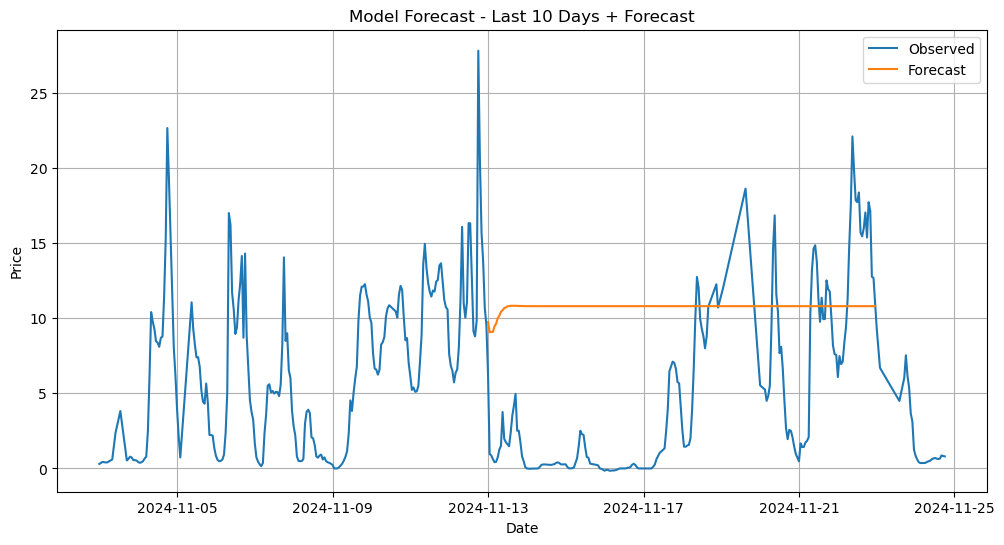

In [ ]:
# Extract forecasted mean directly from the Series
forecast_mean = forecast  # If 'forecast' is a Series, it contains the forecasted values

# If confidence intervals were computed separately, use them
# Ensure they are accessible in the appropriate structure
#forecast_ci = forecast_conf  # Replace 'forecast_conf' with the actual confidence interval data source

# Generate forecast index
forecast_index = pd.date_range(start=spd.index[-forecast_steps] + pd.Timedelta(hours=1),
                               periods=len(forecast_mean), freq='h')


# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean.values,  # Ensure the Series values are used
    #'Lower CI': forecast_ci.iloc[:, 0].values,  # Lower confidence interval
    #'Upper CI': forecast_ci.iloc[:, 1].values   # Upper confidence interval
}, index=forecast_index)

# Plot results
plot_results(spdxs, forecast_df, 10)


In [321]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(actual_classes,predicted_classes):

    matrix = confusion_matrix(actual_classes, predicted_classes)

    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [322]:

def apply_pipe(df, pipe, prediction_hours, days_back):

    train = df[:-prediction_hours]
    test = df[-prediction_hours:]

    y_train = train['Price']
    x_train = train.drop('Price', axis=1)
    y_test = test['Price']
    x_test = test.drop('Price', axis=1)



    pipe.fit(x_train, y_train)
    predictions = pipe.predict(x_test)

    results = pd.DataFrame({'Forecast': predictions}, index=test.index)


    plot_results(df, results, days_back)


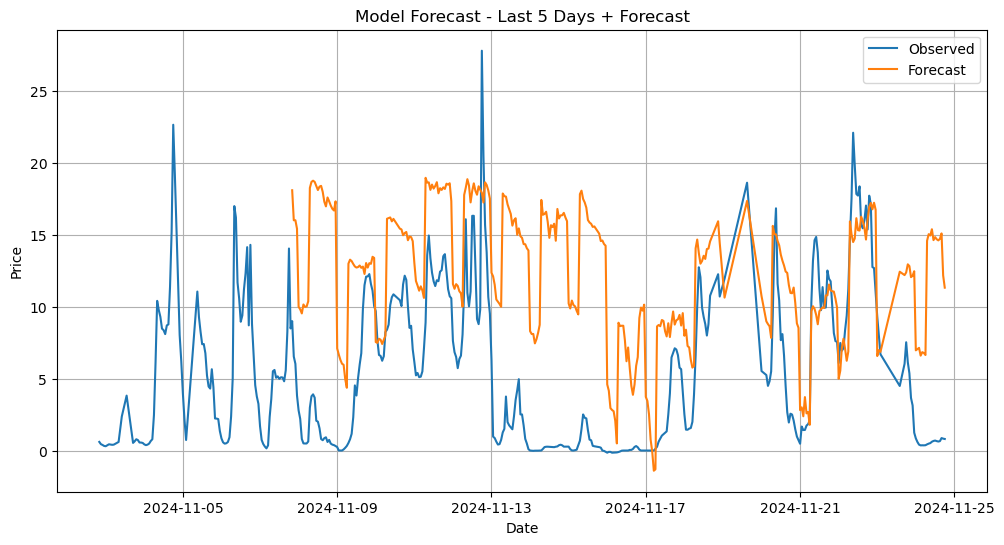

In [ ]:
#idk it goes flat trying linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LinearRegression())

apply_pipe(spd, pipe, 360, 5)



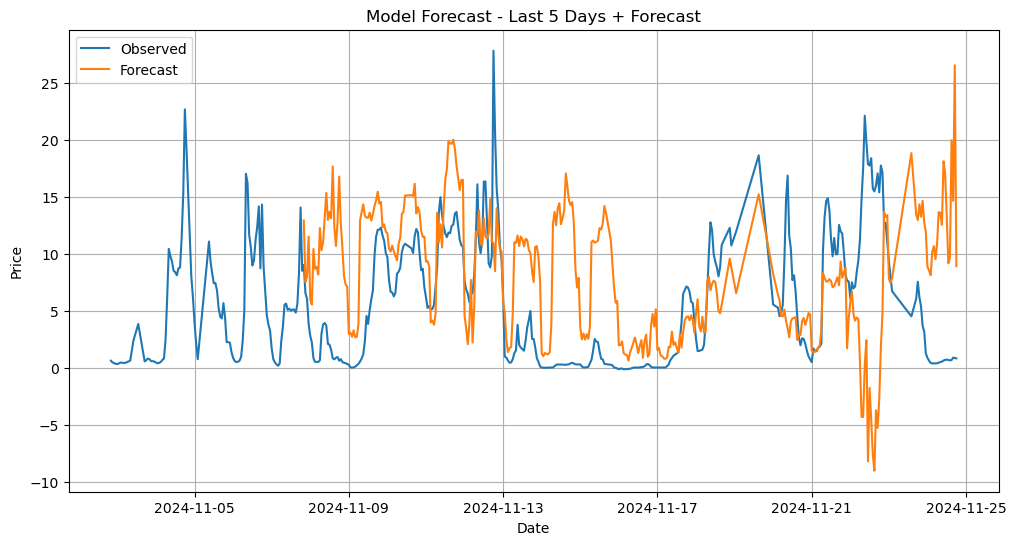

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

apply_pipe(spd, pipe, 360, 5)

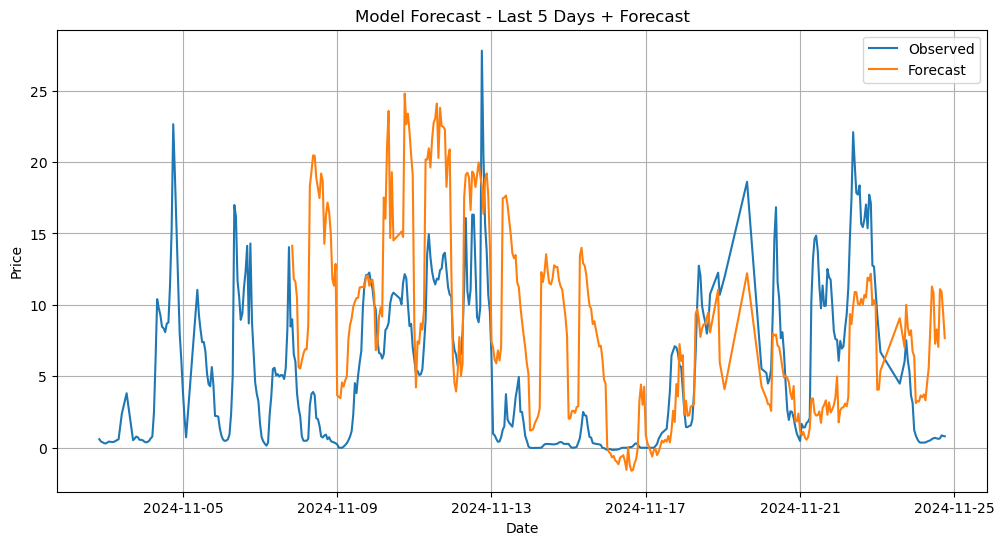

In [ ]:
from sklearn.svm import SVR

pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(spd, pipe, 360, 5)

In [326]:
stock_prices = stock_prices.set_index('Time')

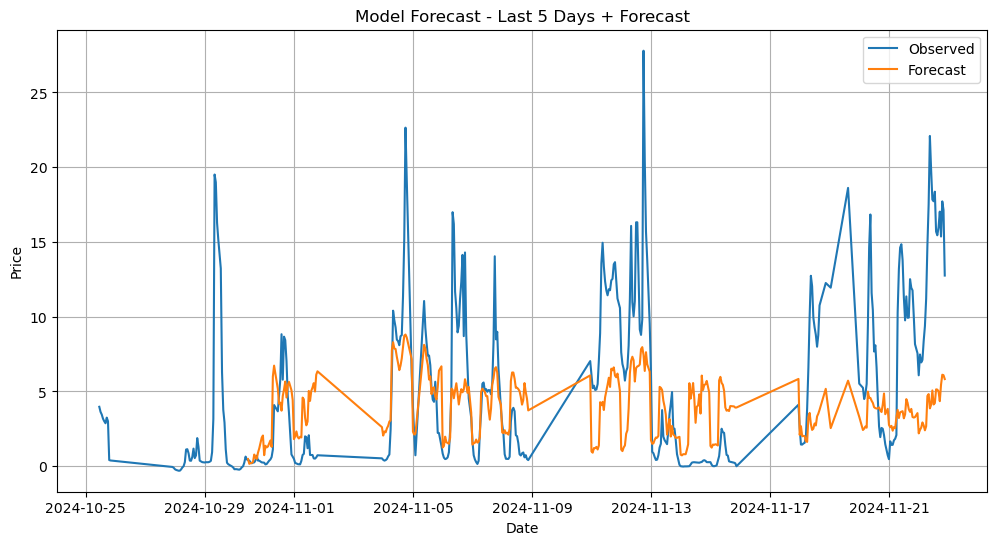

In [ ]:
stockpd = pd.merge(spd, stock_prices, on='Time', how='inner')
pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(stockpd, pipe, 360, 5)

In [332]:
weekly_spd = spd.resample('W').mean()
weekly_spd = weekly_spd.dropna()

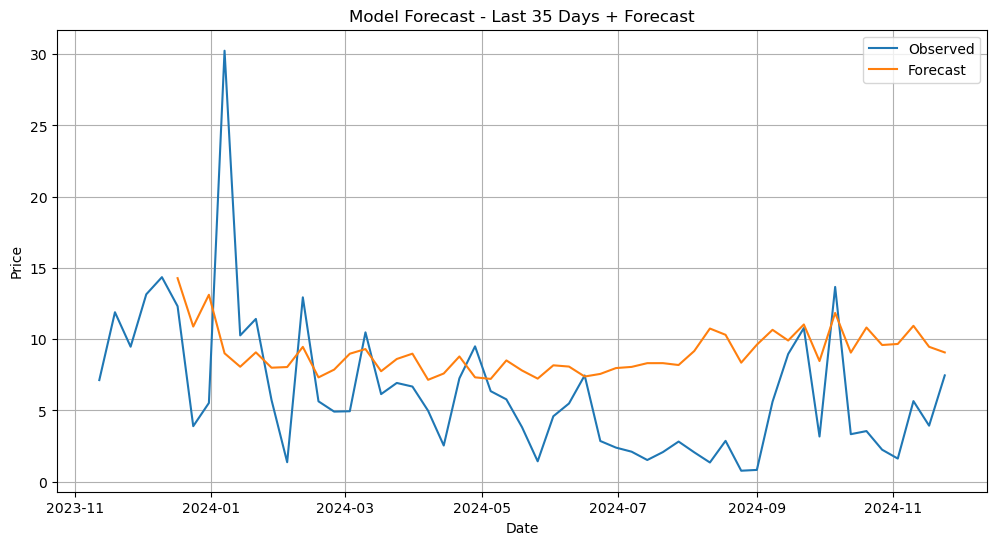

In [336]:


pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(weekly_spd, pipe, 50, 35)

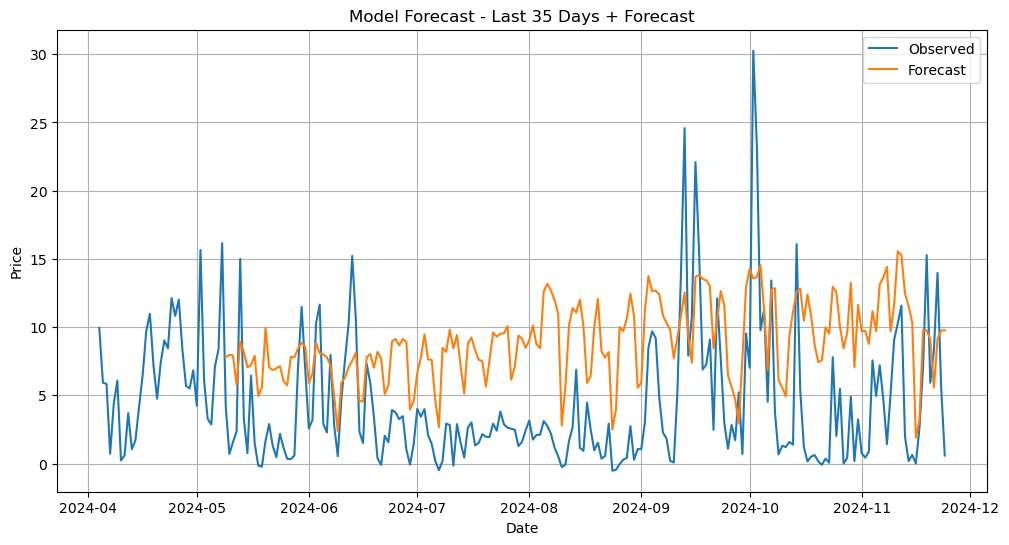

In [338]:
daily_spd = spd.resample('D').mean()
daily_spd = daily_spd.dropna()


pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(daily_spd, pipe, 200, 35)

C:\Users\Duarte\AppData\Local\Temp\ipykernel_6128\2593529099.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spd = spd.resample('M').mean()


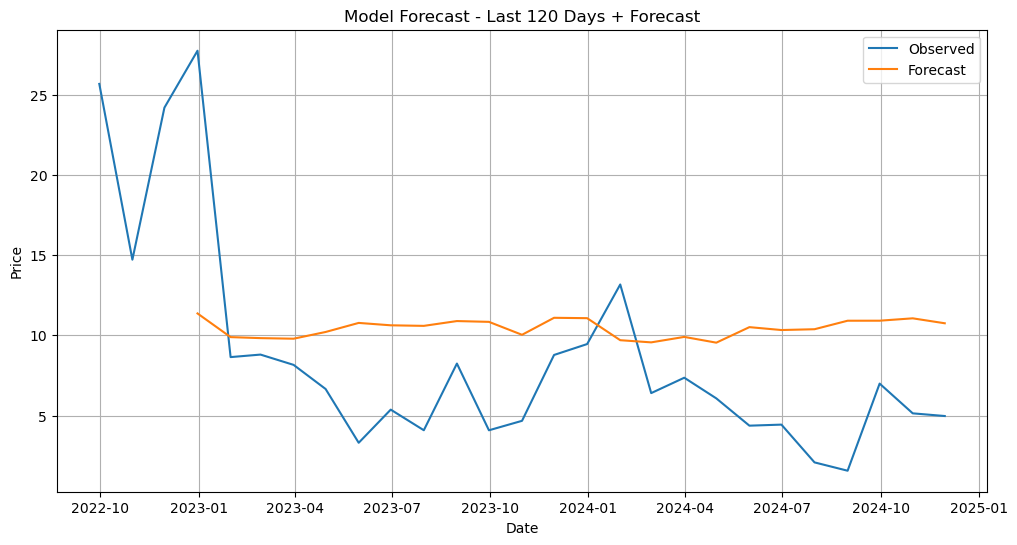

In [339]:
monthly_spd = spd.resample('M').mean()
monthly_spd = monthly_spd.dropna()


pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(monthly_spd, pipe, 24, 120)

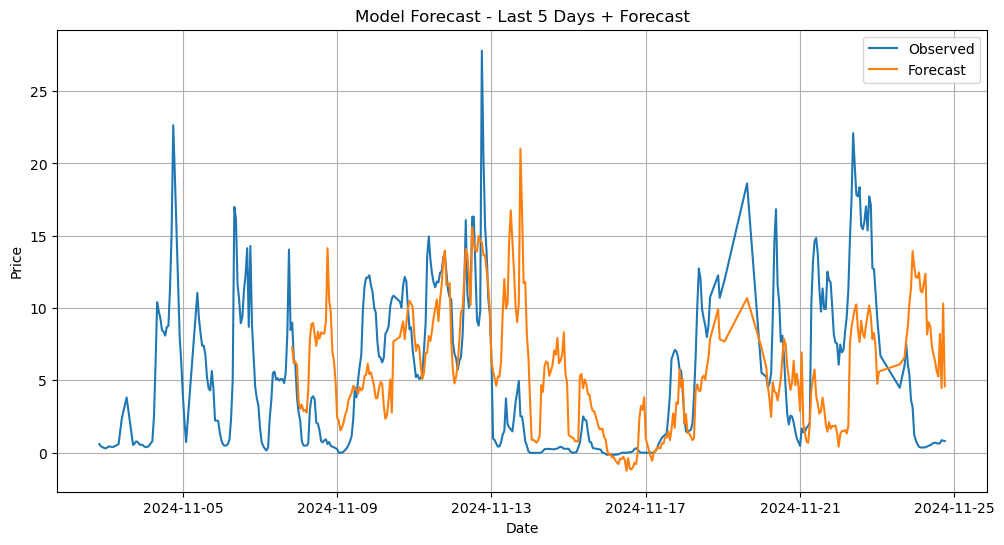

In [ ]:
lagged_spd = spd.copy()
lagged_spd['price_lag24'] = lagged_spd['Price'].shift(24)
lagged_spd['price_lag168'] = lagged_spd['Price'].shift(168)
lagged_spd = lagged_spd.dropna()

pipe = make_pipeline(StandardScaler(), SVR())

apply_pipe(lagged_spd, pipe, 360, 5)

In [344]:
spd.columns

Index(['Price', 'Pressure (hPa)', 'Temperature (°C)',
       'Max Avg Wind Speed (m/s)', 'Avg Wind Direction (°)', 'Max Gust (m/s)',
       'Humidity (%)', 'Hour of Day', 'Month', 'Temperature Variation',
       'timeofyear', 'weekend', 'night'],
      dtype='object')

In [351]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def crossval(df, pipe):

    tscv = TimeSeriesSplit(n_splits=5)

    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_idx, test_idx in tscv.split(df[df.columns[1:]]): 
        X_train, X_test = df.iloc[train_idx], df.iloc[test_idx]
        y_train, y_test = df['Price'].iloc[train_idx], df['Price'].iloc[test_idx]
        

        features = df.columns[1:]
        pipe.fit(X_train[features], y_train)
        
        predictions = pipe.predict(X_test[features])
        
        mae = mean_absolute_error(y_test, predictions)
        rmse = root_mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Step 8: Print the average scores from all the splits
    print(f"Average MAE: {sum(mae_scores)/len(mae_scores)}")
    print(f"Average RMSE: {sum(rmse_scores)/len(rmse_scores)}")
    print(f"Average R²: {sum(r2_scores)/len(r2_scores)}")


In [349]:
crossval(spd, make_pipeline(StandardScaler(), SVR()))

Average MAE: 7.986363043463561
Average RMSE: 11.47963141887199
Average R²: -0.3152053894921174


In [352]:
crossval(lagged_spd, make_pipeline(StandardScaler(), SVR()))

Average MAE: 5.98497662466695
Average RMSE: 9.62768043039852
Average R²: 0.11215769301718163


In [353]:
vls = spd.copy()
vls['price_lag1'] = vls['Price'].shift(1)
vls['price_lag12'] = vls['Price'].shift(12)
vls['price_lag24'] = vls['Price'].shift(24)
vls['price_lag168'] = vls['Price'].shift(168)
vls = vls.dropna()
crossval(vls, make_pipeline(StandardScaler(), SVR()))

Average MAE: 3.674963335378746
Average RMSE: 7.538690623349991
Average R²: 0.48412450734238927


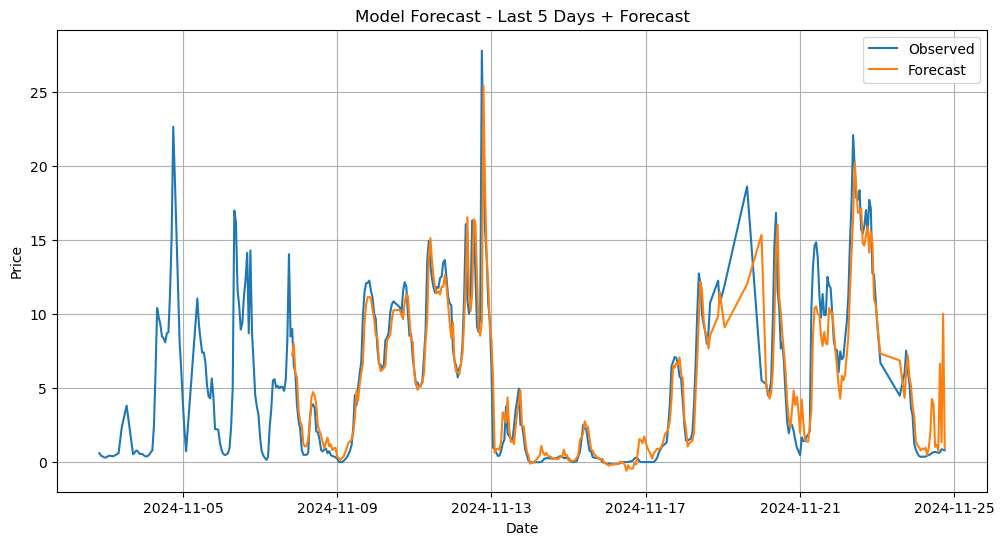

In [354]:
apply_pipe(vls, make_pipeline(StandardScaler(), SVR()), 360, 5)

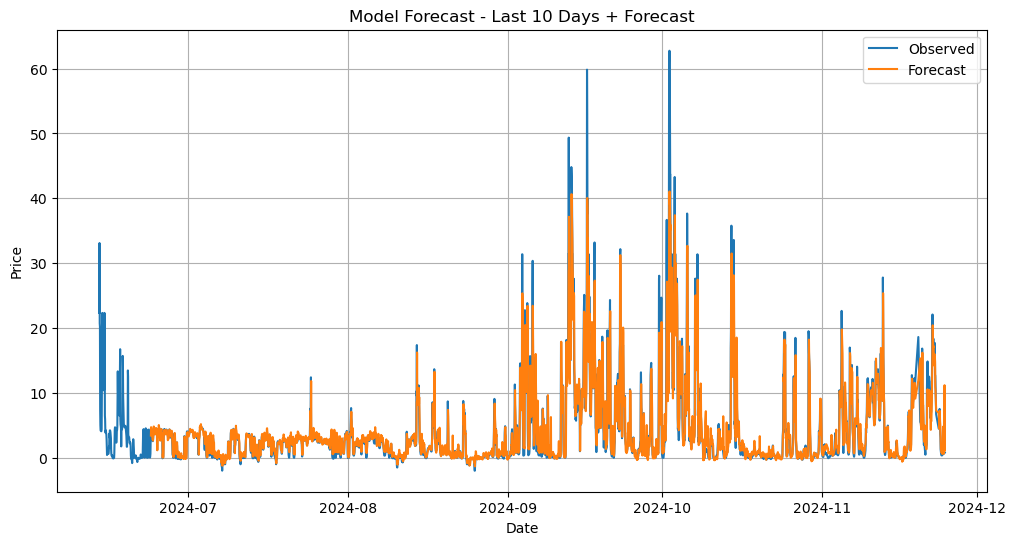

In [355]:
apply_pipe(vls, make_pipeline(StandardScaler(), SVR()), 3600, 10)

In [356]:
#parameter tuning etc etc